In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [63]:
df = pd.read_csv('C:/Users/karan/Desktop/Projects/Datas/Global_superstore_16.csv')

In [64]:
df.head()

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Returned
0,0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,...,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High,NaN
1,1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,NaN
2,2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,NaN
3,3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,NaN
4,4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,NaN


In [65]:
column_s = df.columns

In [66]:
column_s

Index(['Unnamed: 0', 'Row ID', 'Order ID', 'Order Date', 'Ship Date',
       'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Postal Code',
       'City', 'State', 'Country', 'Region', 'Market', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority', 'Returned'],
      dtype='object')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      51290 non-null  int64  
 1   Row ID          51290 non-null  int64  
 2   Order ID        51290 non-null  object 
 3   Order Date      51290 non-null  object 
 4   Ship Date       51290 non-null  object 
 5   Ship Mode       51290 non-null  object 
 6   Customer ID     51290 non-null  object 
 7   Customer Name   51290 non-null  object 
 8   Segment         51290 non-null  object 
 9   Postal Code     9994 non-null   float64
 10  City            51290 non-null  object 
 11  State           51290 non-null  object 
 12  Country         51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Market          51290 non-null  object 
 15  Product ID      51290 non-null  object 
 16  Category        51290 non-null  object 
 17  Sub-Category    51290 non-null 

In [68]:
df.isnull().sum()

Unnamed: 0            0
Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
Postal Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
Returned          49088
dtype: int64

In [69]:
df.drop(columns = ['Unnamed: 0', 'Postal Code'], inplace = True)
df['Returned'].fillna('No', inplace=True)

In [70]:
df['Year'] = pd.DatetimeIndex(df['Order Date']).year
df['Month'] = pd.DatetimeIndex(df['Order Date']).month
df['Day'] = pd.DatetimeIndex(df['Order Date']).day
df['Total Sales'] = df['Sales']* df['Quantity']
df['Total Profit'] = df['Profit']*df['Quantity']

In [71]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Region            0
Market            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
Returned          0
Year              0
Month             0
Day               0
Total Sales       0
Total Profit      0
dtype: int64

Analysis and trends

In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,51290.0,25645.500000,14806.291990,1.000,12823.250000,25645.5000,38467.7500,51290.000
Sales,51290.0,246.490581,487.565361,0.444,30.758625,85.0530,251.0532,22638.480
Quantity,51290.0,3.476545,2.278766,1.000,2.000000,3.0000,5.0000,14.000
Discount,51290.0,0.142908,0.212280,0.000,0.000000,0.0000,0.2000,0.850
Profit,51290.0,28.610982,174.340972,-6599.978,0.000000,9.2400,36.8100,8399.976
Shipping Cost,51290.0,26.478567,57.251373,1.002,2.610000,7.7900,24.4500,933.570
Year,51290.0,2013.777208,1.098931,2012.000,2013.000000,2014.0000,2015.0000,2015.000
Month,51290.0,7.516027,3.300526,1.000,5.000000,8.0000,10.0000,12.000
Day,51290.0,15.806005,8.742679,1.000,8.000000,16.0000,23.0000,31.000
Total Sales,51290.0,1205.327987,3452.079528,0.444,66.930000,245.7720,904.8750,135830.880


In [73]:
df.nunique()

Row ID            51290
Order ID          25728
Order Date         1430
Ship Date          1464
Ship Mode             4
Customer ID       17415
Customer Name       796
Segment               3
City               3650
State              1102
Country             165
Region               23
Market                5
Product ID         3788
Category              3
Sub-Category         17
Product Name       3788
Sales             26080
Quantity             14
Discount             28
Profit            27675
Shipping Cost     16558
Order Priority        4
Returned              2
Year                  4
Month                12
Day                  31
Total Sales       29922
Total Profit      29846
dtype: int64

In [74]:
Countrywise = df['Country'].value_counts()/len(df)

Text(0.5, 1.0, 'Country wise orders')

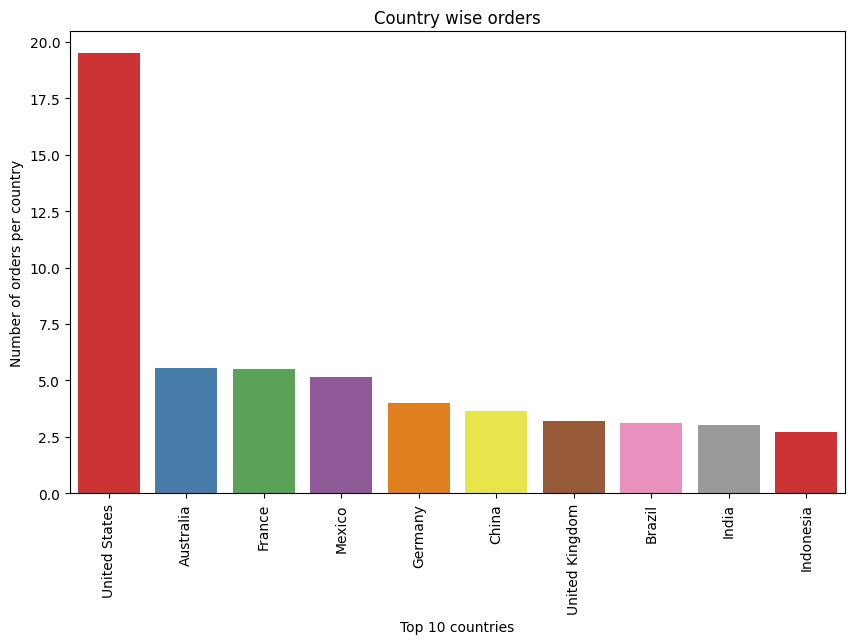

In [75]:
plt.figure(figsize = (10,6))
sns.barplot(x = Countrywise.index[:10], y = Countrywise[:10]*100, palette='Set1')
plt.xticks(rotation = 90)
plt.xlabel('Top 10 countries')
plt.ylabel('Number of orders per country')
plt.title('Country wise orders')

Text(0.5, 1.0, 'State wise orders')

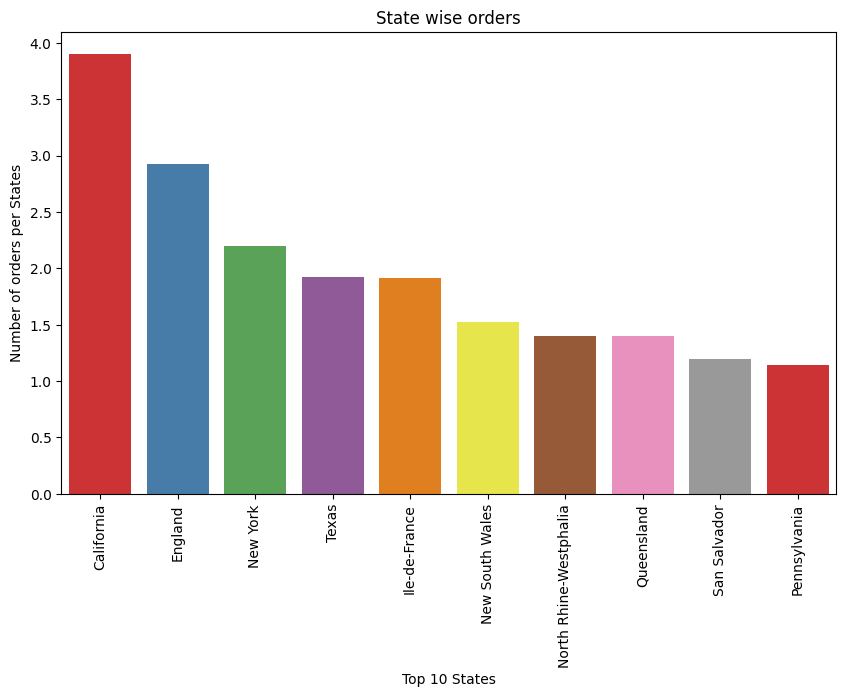

In [76]:
Statewise = df['State'].value_counts()/len(df)
plt.figure(figsize = (10,6))
sns.barplot(x = Statewise.index[:10], y = Statewise[:10]*100, palette='Set1')
plt.xticks(rotation = 90)
plt.xlabel('Top 10 States')
plt.ylabel('Number of orders per States')
plt.title('State wise orders')

Text(0.5, 1.0, 'Sub Catyegory wise orders')

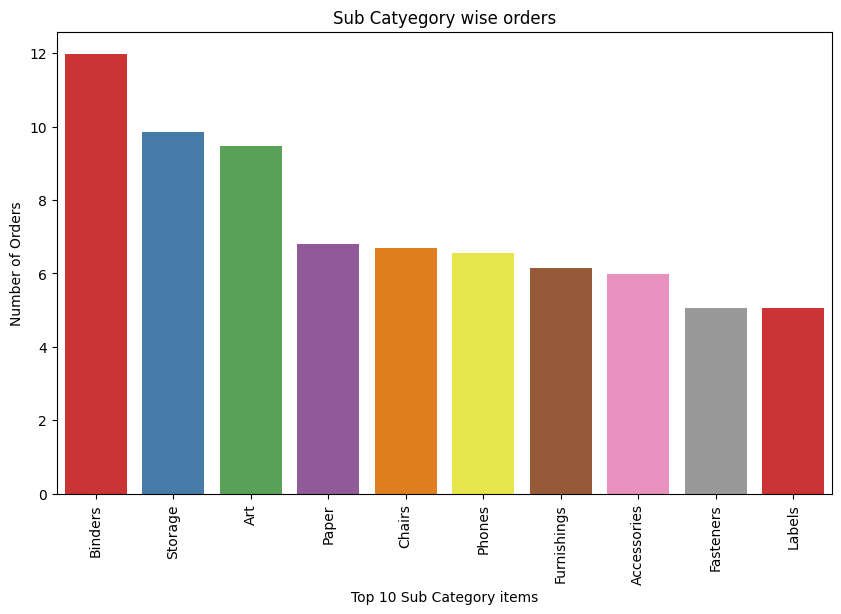

In [77]:
Goods_subcategory = df['Sub-Category'].value_counts()/len(df)
plt.figure(figsize = (10,6))
sns.barplot(x = Goods_subcategory.index[:10], y = Goods_subcategory[:10]*100, palette='Set1')
plt.xticks(rotation = 90)
plt.xlabel('Top 10 Sub Category items')
plt.ylabel('Number of Orders')
plt.title('Sub Catyegory wise orders')

In [78]:
cat_col = ['Ship Mode', 'Segment', 'Market', 'Category', 'Order Priority', 'Year']

Ship Mode
                Ship Mode      Ratio
Ship Mode                           
Standard Class      30775  60.001950
Second Class        10309  20.099435
First Class          7505  14.632482
Same Day             2701   5.266134


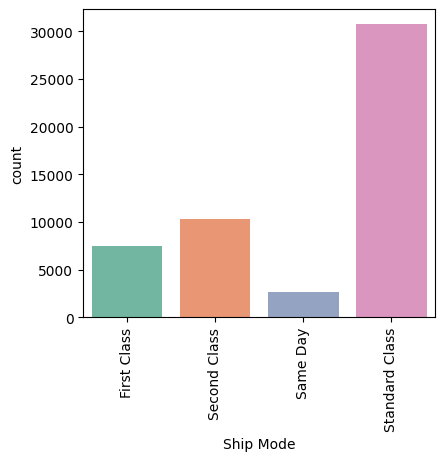

Segment
             Segment      Ratio
Segment                        
Consumer       26518  51.702086
Corporate      15429  30.081887
Home Office     9343  18.216027


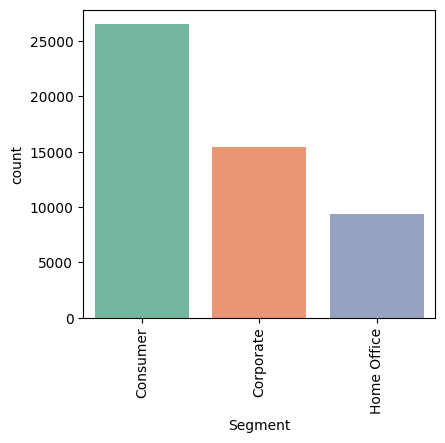

Market
              Market      Ratio
Market                         
Asia Pacific   14302  27.884578
Europe         11729  22.868005
USCA           10378  20.233964
LATAM          10294  20.070189
Africa          4587   8.943264


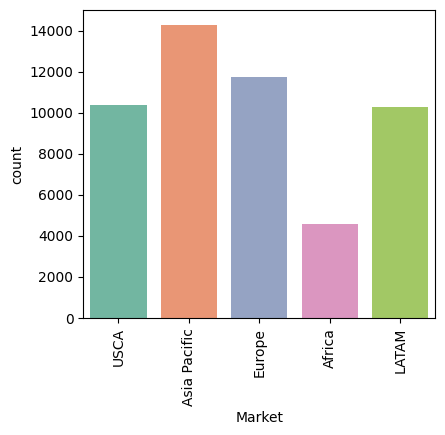

Category
                 Category      Ratio
Category                            
Office Supplies     31289  61.004094
Technology          10141  19.771885
Furniture            9860  19.224020


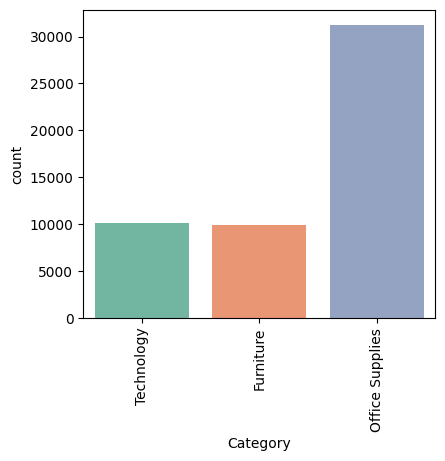

Order Priority
                Order Priority      Ratio
Order Priority                           
Medium                   29433  57.385455
High                     15501  30.222266
Critical                  3932   7.666212
Low                       2424   4.726067


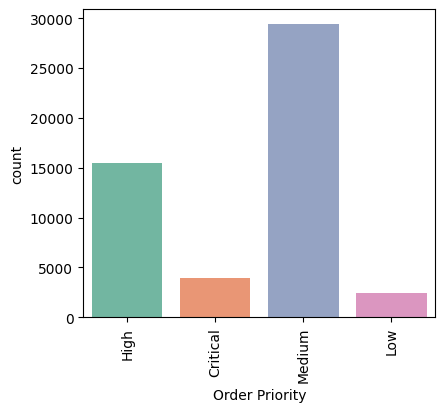

Year
       Year      Ratio
Year                  
2015  17531  34.180152
2014  13799  26.903880
2013  10962  21.372587
2012   8998  17.543381


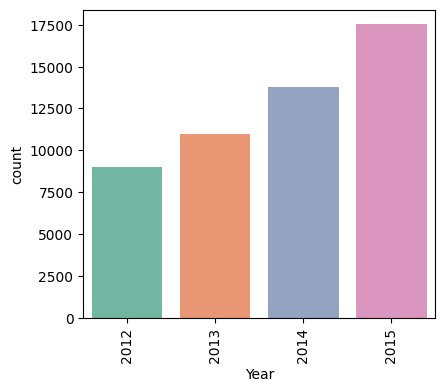

In [79]:
for col in cat_col:
    print(col)
    plt.figure(figsize = (10,4))
    plt.subplot(1,2,1)
    sns.countplot(x = col, data = df, palette = 'Set2')
    print(pd.DataFrame({col:df[col].value_counts(),
                       "Ratio":100*df[col].value_counts()/len(df)}))
    plt.xticks(rotation = 90)
    plt.show()

In [80]:
num_cols = ["Sales", "Quantity", "Discount", "Profit", "Shipping Cost"]

count    51290.000000
mean       246.490581
std        487.565361
min          0.444000
25%         30.758625
50%         85.053000
75%        251.053200
max      22638.480000
Name: Sales, dtype: float64


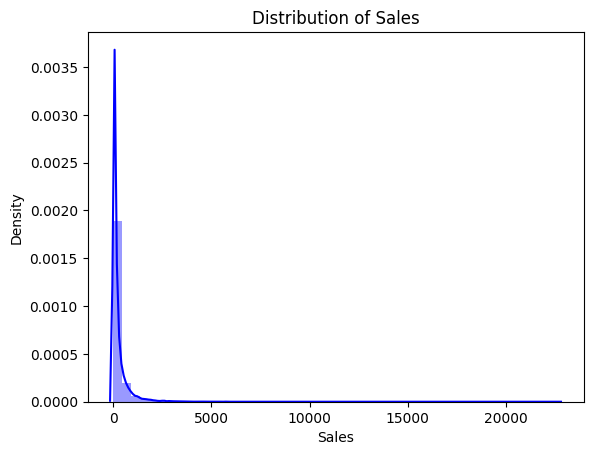

count    51290.000000
mean         3.476545
std          2.278766
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         14.000000
Name: Quantity, dtype: float64


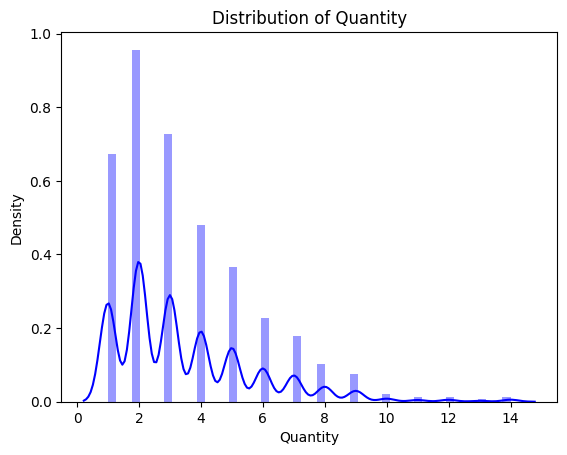

count    51290.000000
mean         0.142908
std          0.212280
min          0.000000
25%          0.000000
50%          0.000000
75%          0.200000
max          0.850000
Name: Discount, dtype: float64


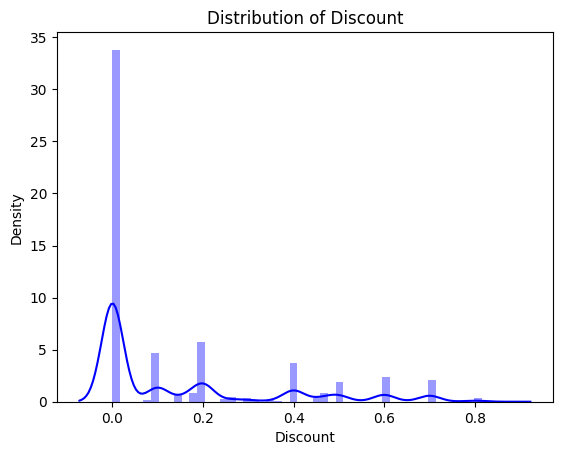

count    51290.000000
mean        28.610982
std        174.340972
min      -6599.978000
25%          0.000000
50%          9.240000
75%         36.810000
max       8399.976000
Name: Profit, dtype: float64


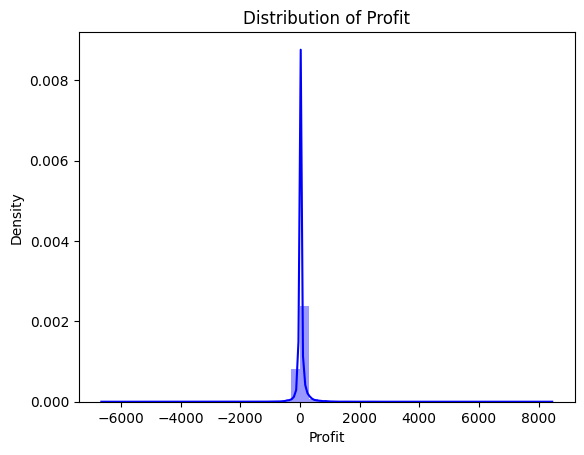

count    51290.000000
mean        26.478567
std         57.251373
min          1.002000
25%          2.610000
50%          7.790000
75%         24.450000
max        933.570000
Name: Shipping Cost, dtype: float64


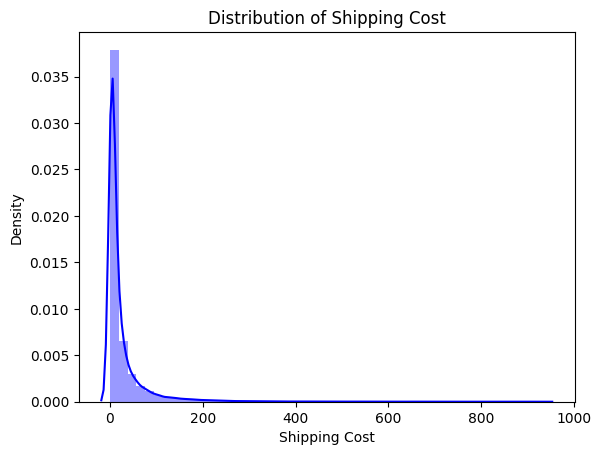

In [81]:
for col in df[num_cols].columns:
    plt.subplot(1,1,1)
    sns.distplot(df[col], color="blue")
    plt.title("Distribution of {}".format(col))
    print(df[col].describe().T)
    plt.show()
    

Text(0.5, 1.0, 'Correlation Between Features')

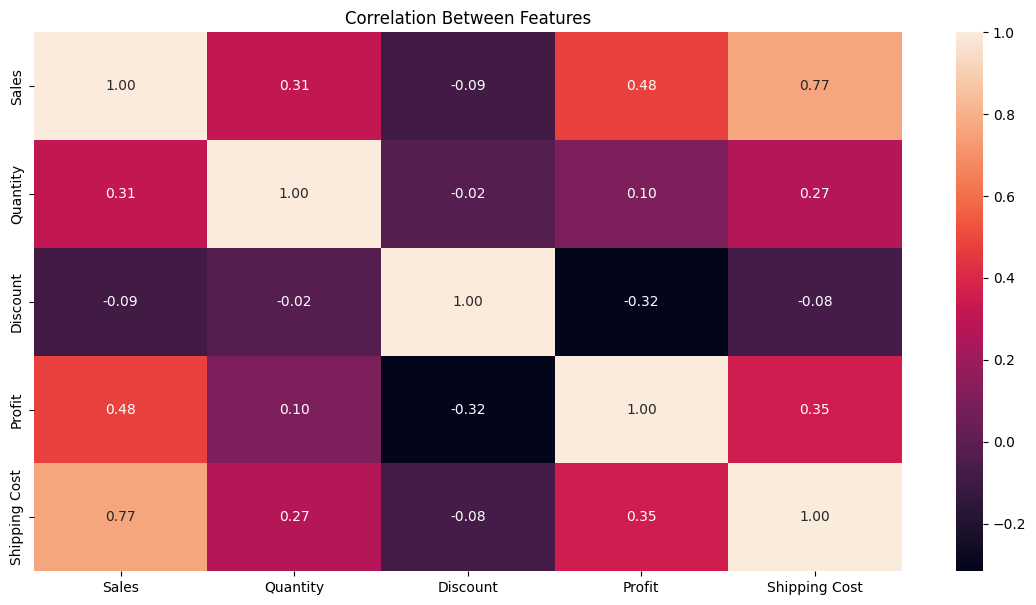

In [82]:
corr=df[num_cols].corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr,annot=True,fmt=".2f")
plt.title("Correlation Between Features")

In [83]:
df['Market'].head()

0            USCA
1    Asia Pacific
2    Asia Pacific
3          Europe
4          Africa
Name: Market, dtype: object

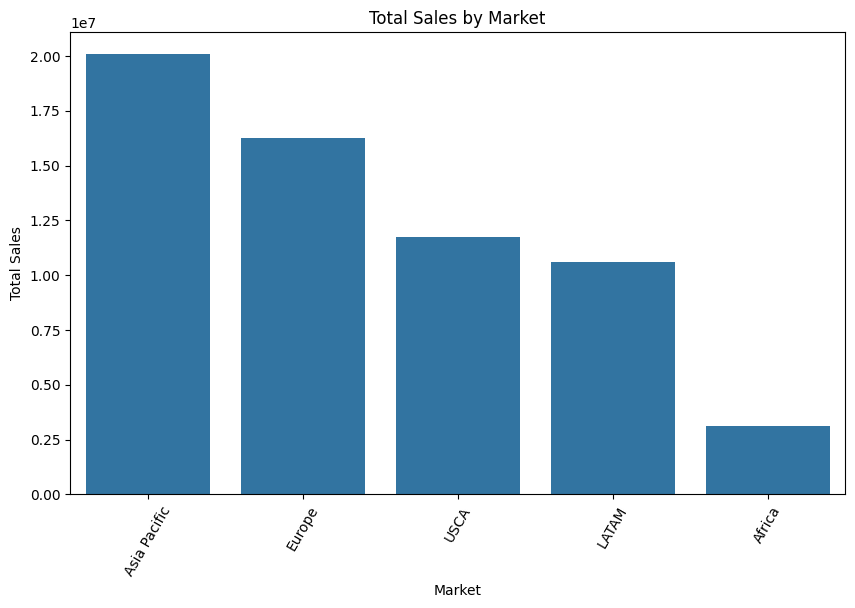

In [84]:
a=df.groupby("Market").agg({"Total Sales":"sum"}).sort_values("Total Sales",ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=a.index,y=a["Total Sales"])
plt.xticks(rotation=60)
plt.title("Total Sales by Market")
plt.show()


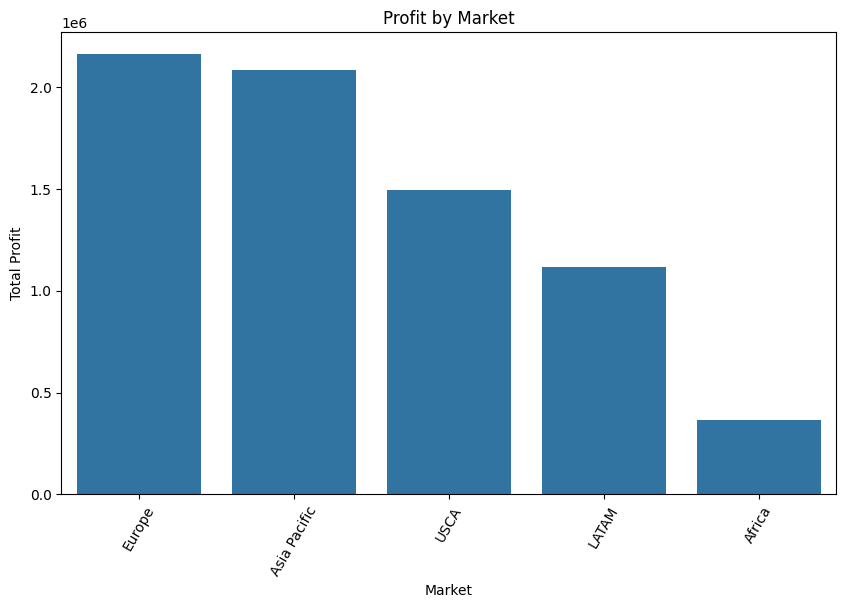

In [85]:
a=df.groupby("Market").agg({"Total Profit":"sum"}).sort_values("Total Profit",ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=a.index,y=a["Total Profit"])
plt.xticks(rotation=60)
plt.title("Profit by Market")
plt.show()

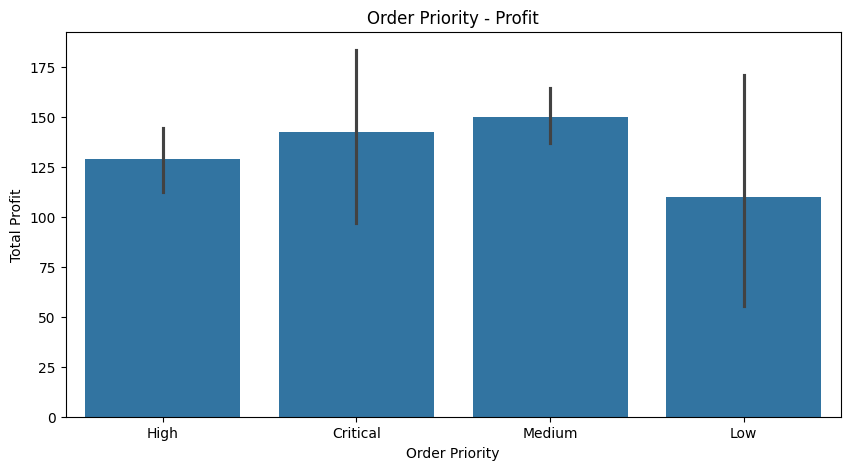

In [86]:
plt.figure(figsize=(10,5))
sns.barplot(x="Order Priority",y="Total Profit",data=df)
plt.title("Order Priority - Profit")
plt.show()

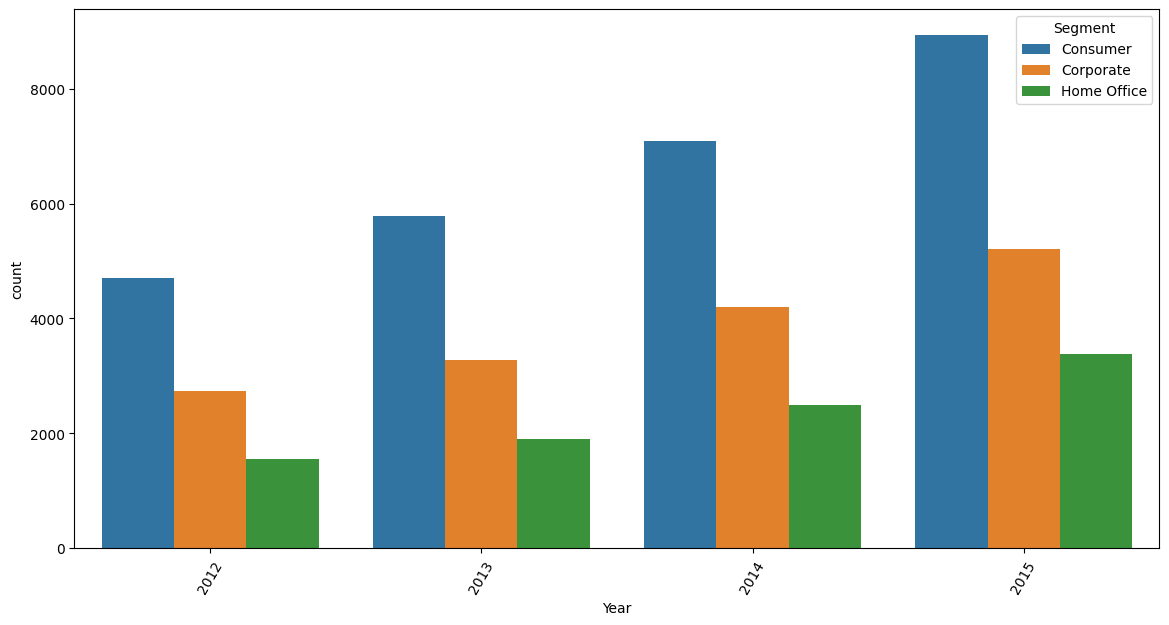

In [87]:
plt.figure(figsize=(14,7))

sns.countplot(x="Year",hue="Segment",data=df)
plt.xticks(rotation=60)
plt.show()

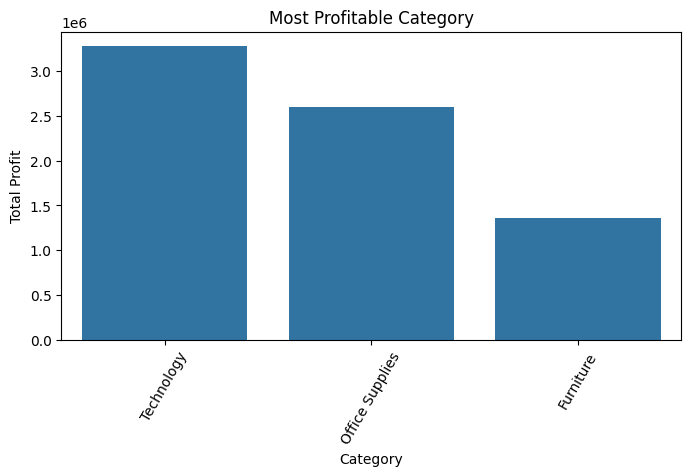

In [88]:
a=df.groupby("Category").agg({"Total Profit":"sum"}).sort_values("Total Profit",ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=a.index,y=a["Total Profit"])
plt.xticks(rotation=60)
plt.title("Most Profitable Category")
plt.show()

In [89]:
a=df.groupby("Product Name").agg({"Total Profit":"sum"}).sort_values("Total Profit",ascending=False).head(10)
print(a)

                                                    Total Profit
Product Name                                                    
Canon imageCLASS 2200 Advanced Copier                104159.7024
Motorola Smart Phone, Full Size                       99367.8408
Hoover Stove, Red                                     97913.7530
Cisco Smart Phone, Full Size                          87820.8254
Sauder Classic Bookcase, Traditional                  66698.6000
Canon Wireless Fax, Laser                             61545.3508
Nokia Smart Phone, Full Size                          52692.4475
SAFCO Executive Leather Armchair, Black               52099.5600
Harbour Creations Executive Leather Armchair, A...    52020.6548
Hamilton Beach Stove, Silver                          49336.4970


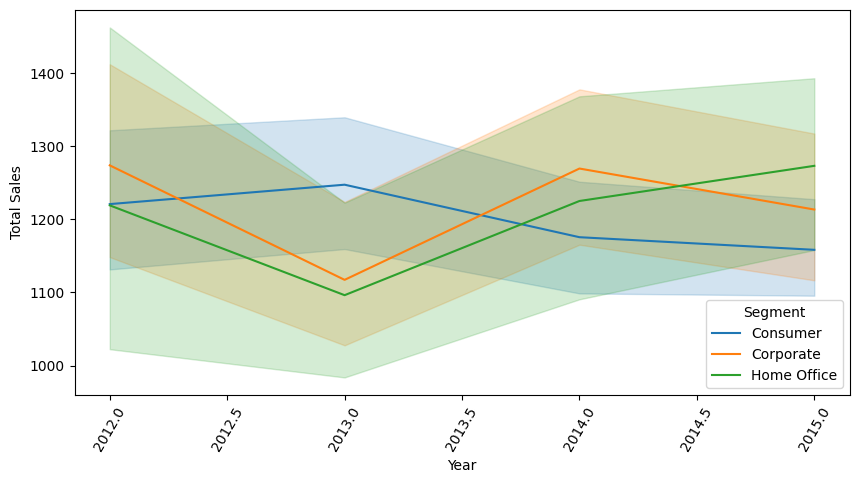

In [90]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Year",y="Total Sales",hue="Segment",data=df)
plt.xticks(rotation=60)
plt.show()

In [91]:
df['Month'] = pd.DatetimeIndex(df['Order Date']).month


<H2>Profitability Analysis

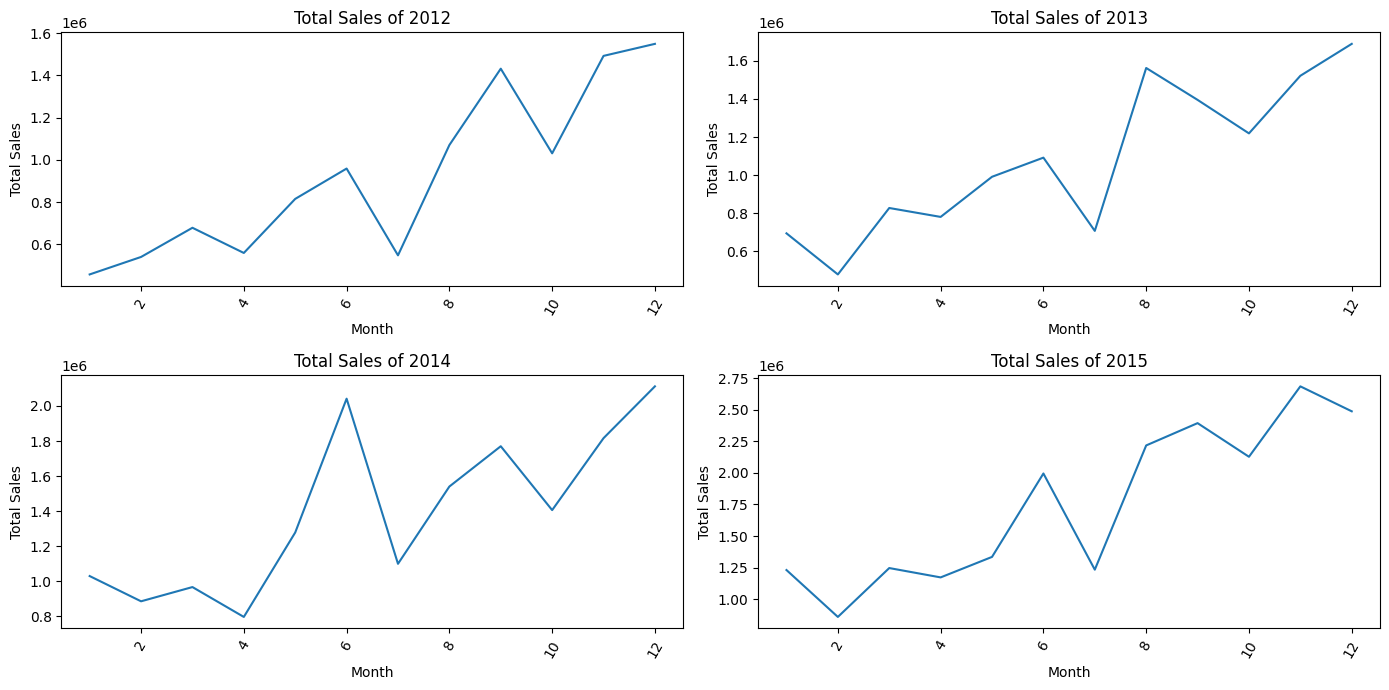

In [92]:
a=df.groupby(["Year","Month"])["Total Sales"].sum()

b=100*a/a.sum()
c=pd.concat([a,b],axis=1)
c.columns=["Total Sales","Ratio"]


plt.figure(figsize=(14,7))

for i in range(2012,2016):
    plt.subplot(2,2,i-2011)
    sns.lineplot(data=c.loc[i],x=c.loc[i].index.get_level_values(0),y="Total Sales")
    plt.xticks(rotation=60)
    plt.xlabel("Month")
    plt.ylabel("Total Sales")
    plt.title("Total Sales of {}".format(i))
    plt.tight_layout()

plt.show()

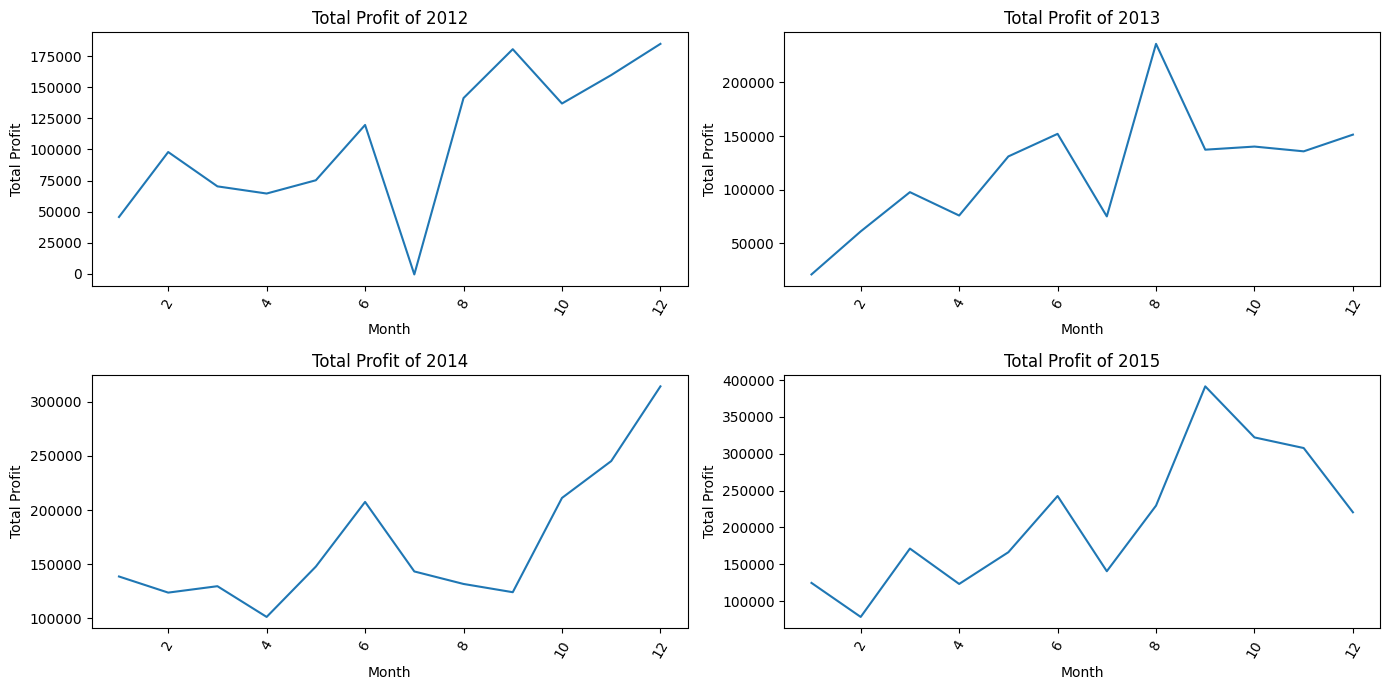

In [93]:
a=df.groupby(["Year","Month"])["Total Profit"].sum()
b=100*a/a.sum()
c=pd.concat([a,b],axis=1)
c.columns=["Total Profit","Ratio"]


plt.figure(figsize=(14,7))
for i in range(2012,2016):
    plt.subplot(2,2,i-2011)
    sns.lineplot(data=c.loc[i],x=c.loc[i].index.get_level_values(0),y="Total Profit")
    plt.xticks(rotation=60)
    plt.xlabel("Month")
    plt.ylabel("Total Profit")
    plt.title("Total Profit of {}".format(i))
    plt.tight_layout()

plt.show()

In [94]:
a=df.groupby(["Year"])["Total Sales"].sum()

Text(0.5, 1.0, 'Sales per year')

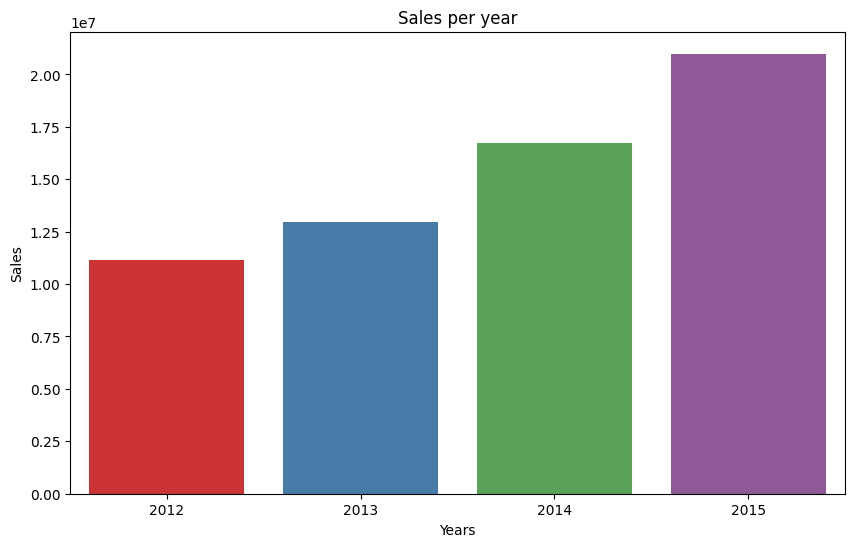

In [95]:
plt.figure(figsize=(10,6))
sns.barplot(x = a.index, y = a, palette='Set1')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.title('Sales per year')

Text(0.5, 1.0, 'Profits per year')

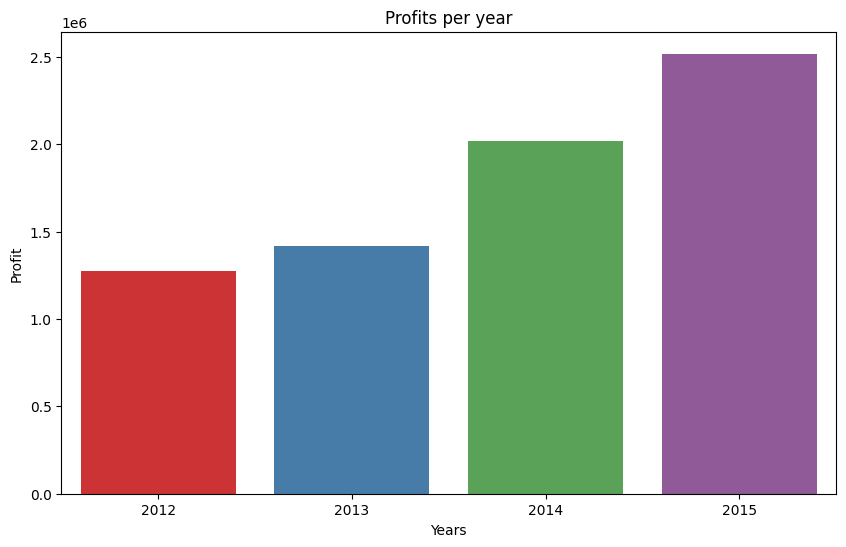

In [96]:
a=df.groupby(["Year"])["Total Profit"].sum()
plt.figure(figsize=(10,6))
sns.barplot(x = a.index, y = a, palette='Set1')
plt.xlabel('Years')
plt.ylabel('Profit')
plt.title('Profits per year')

Text(0.5, 1.0, 'Country wise Sales')

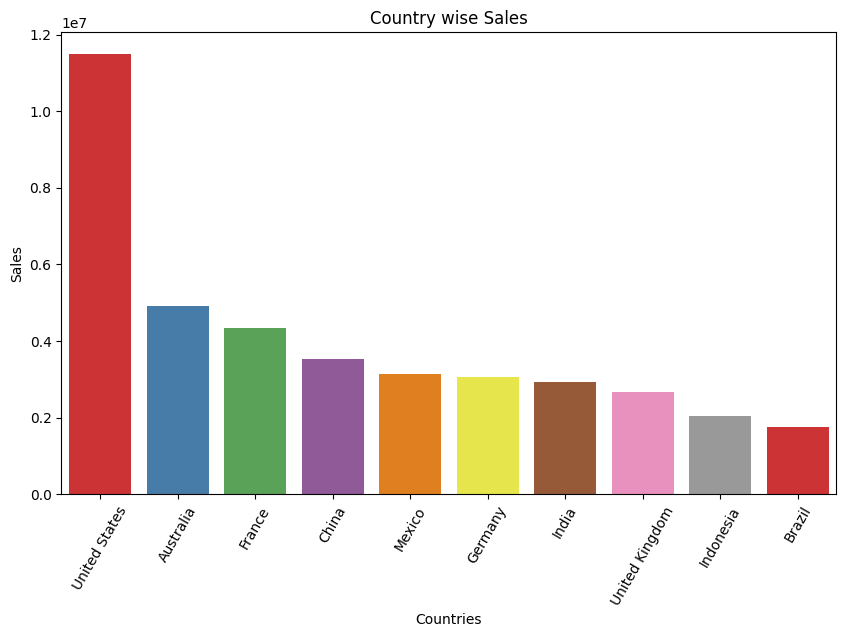

In [97]:
a=df.groupby("Country").agg({"Total Sales":"sum"}).sort_values("Total Sales",ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x = a.index[:10], y = a['Total Sales'][:10], palette='Set1')
plt.xlabel('Countries')
plt.ylabel('Sales')
plt.xticks(rotation = 60)
plt.title('Country wise Sales')

Text(0.5, 1.0, 'Country wise Profits')

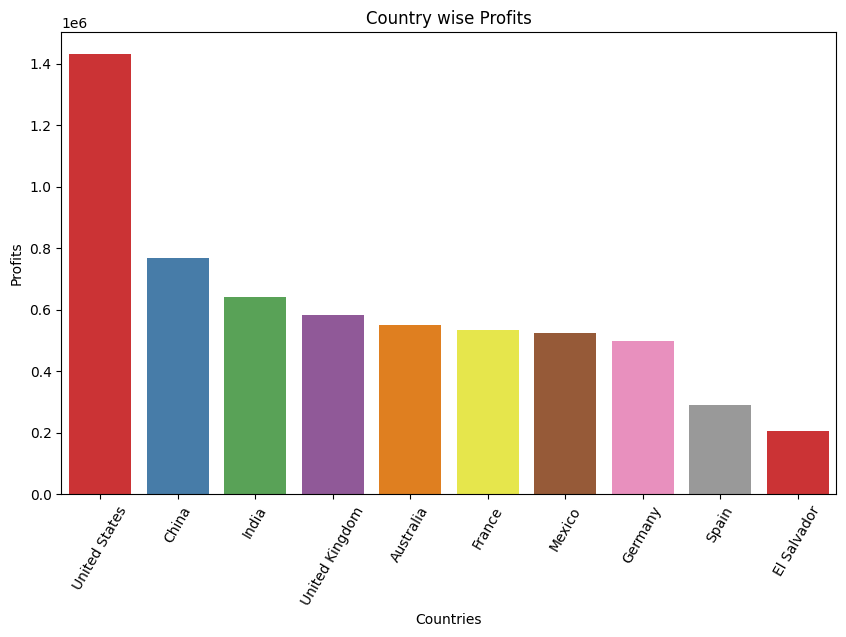

In [98]:
a=df.groupby("Country").agg({"Total Profit":"sum"}).sort_values("Total Profit",ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x = a.index[:10], y = a['Total Profit'][:10], palette='Set1')
plt.xlabel('Countries')
plt.ylabel('Profits')
plt.xticks(rotation = 60)
plt.title('Country wise Profits')

Text(0.5, 1.0, 'State wise Sales')

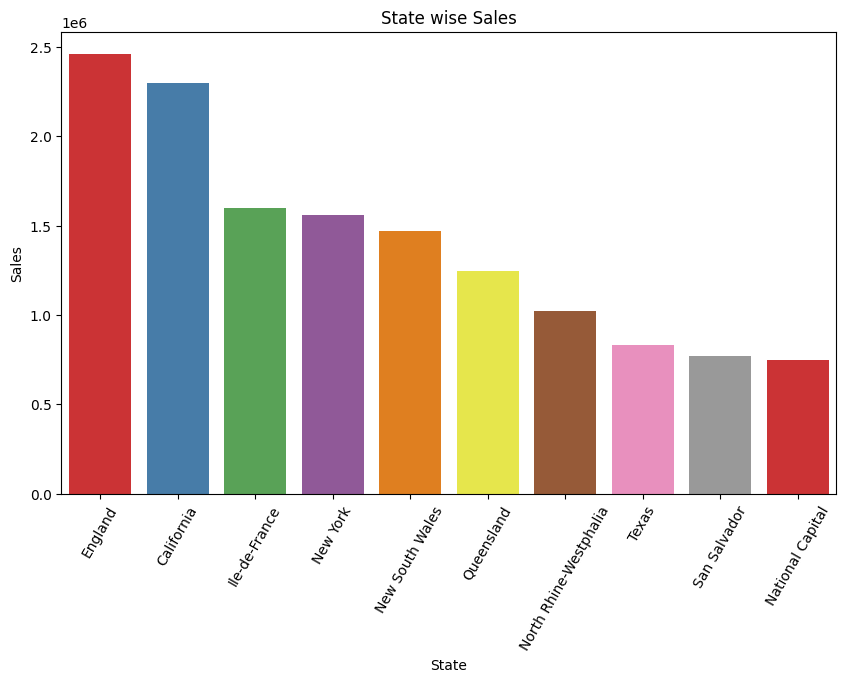

In [99]:
a=df.groupby("State").agg({"Total Sales":"sum"}).sort_values("Total Sales",ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x = a.index[:10], y = a['Total Sales'][:10], palette='Set1')
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation = 60)
plt.title('State wise Sales')

Text(0.5, 1.0, 'State wise Profits')

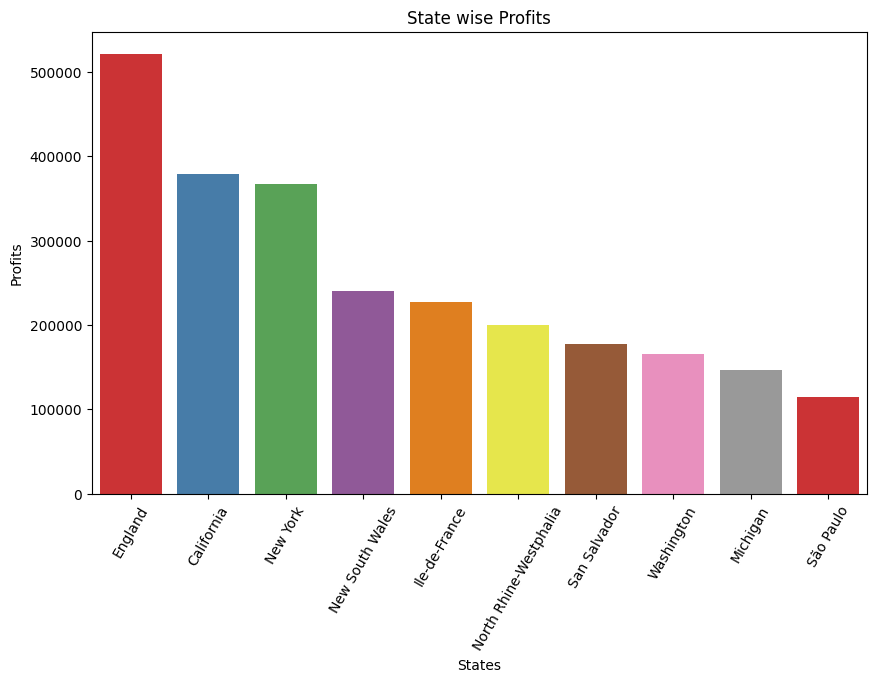

In [100]:
a=df.groupby("State").agg({"Total Profit":"sum"}).sort_values("Total Profit",ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x = a.index[:10], y = a['Total Profit'][:10], palette='Set1')
plt.xlabel('States')
plt.ylabel('Profits')
plt.xticks(rotation = 60)
plt.title('State wise Profits')

In [101]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Region', 'Market', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority', 'Returned', 'Year', 'Month', 'Day',
       'Total Sales', 'Total Profit'],
      dtype='object')

Text(0.5, 1.0, 'Market wise Sales')

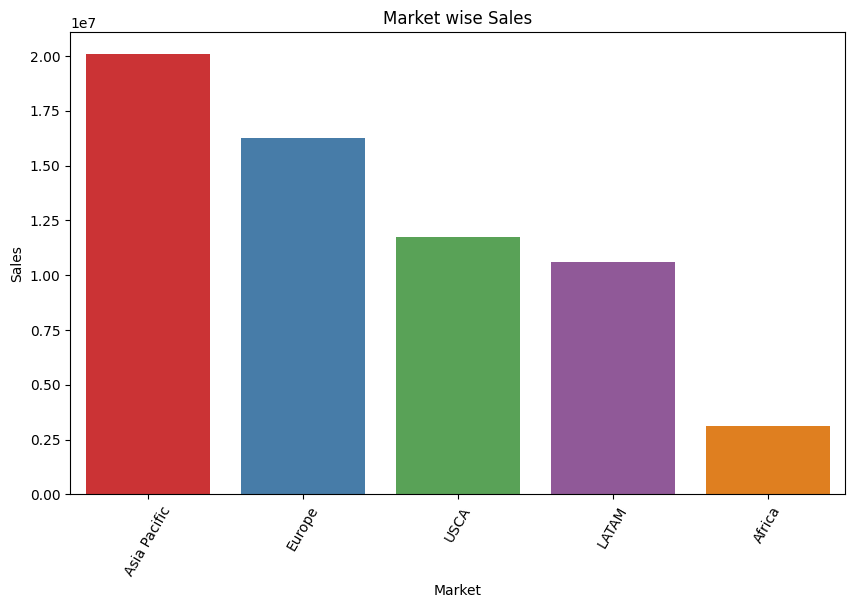

In [102]:
a=df.groupby("Market").agg({"Total Sales":"sum"}).sort_values("Total Sales",ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x = a.index, y = a['Total Sales'], palette='Set1')
plt.xlabel('Market')
plt.ylabel('Sales')
plt.xticks(rotation = 60)
plt.title('Market wise Sales')

Text(0.5, 1.0, 'Market wise Profits')

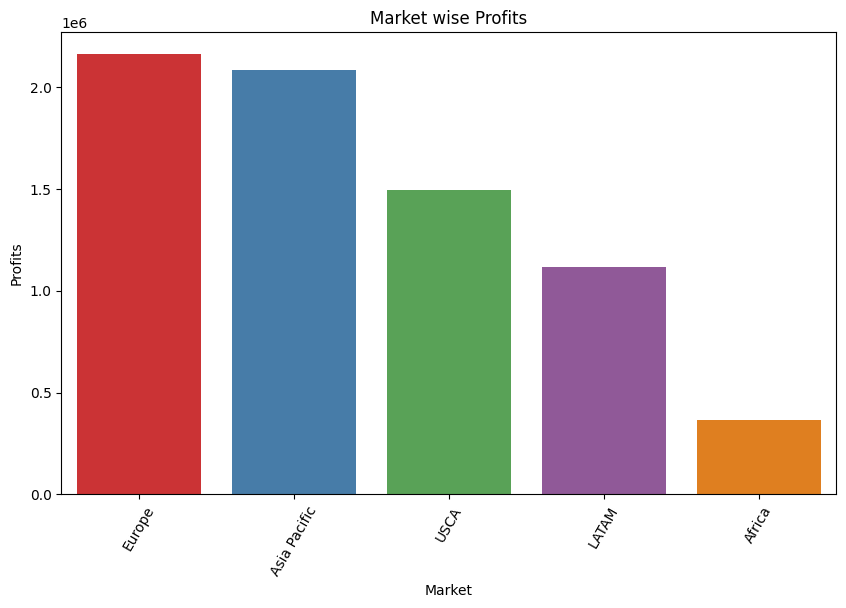

In [103]:
a=df.groupby("Market").agg({"Total Profit":"sum"}).sort_values("Total Profit",ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x = a.index[:10], y = a['Total Profit'][:10], palette='Set1')
plt.xlabel('Market')
plt.ylabel('Profits')
plt.xticks(rotation = 60)
plt.title('Market wise Profits')

Text(0.5, 1.0, 'Segment wise Sales')

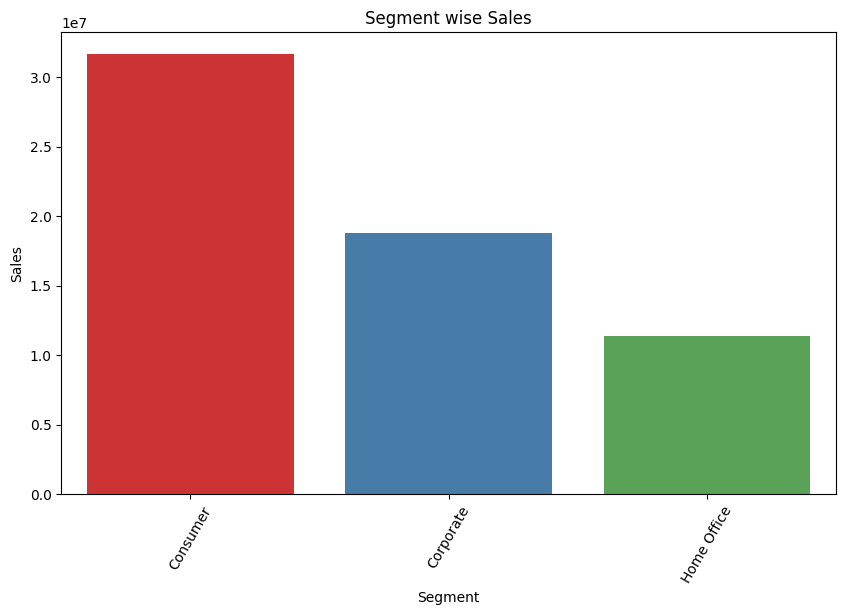

In [104]:
a=df.groupby("Segment").agg({"Total Sales":"sum"}).sort_values("Total Sales",ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x = a.index, y = a['Total Sales'], palette='Set1')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.xticks(rotation = 60)
plt.title('Segment wise Sales')

Text(0.5, 1.0, 'Segment wise Profits')

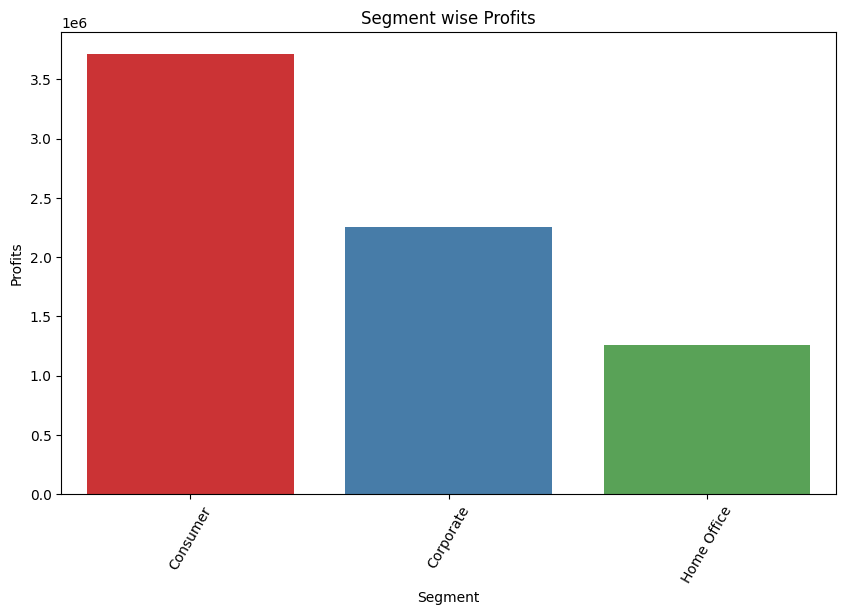

In [105]:
a=df.groupby("Segment").agg({"Total Profit":"sum"}).sort_values("Total Profit",ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x = a.index[:10], y = a['Total Profit'][:10], palette='Set1')
plt.xlabel('Segment')
plt.ylabel('Profits')
plt.xticks(rotation = 60)
plt.title('Segment wise Profits')

<H2>Customer Segmentation

In [106]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Region', 'Market', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority', 'Returned', 'Year', 'Month', 'Day',
       'Total Sales', 'Total Profit'],
      dtype='object')

Text(0.5, 1.0, 'Top 10 Frequent Customers')

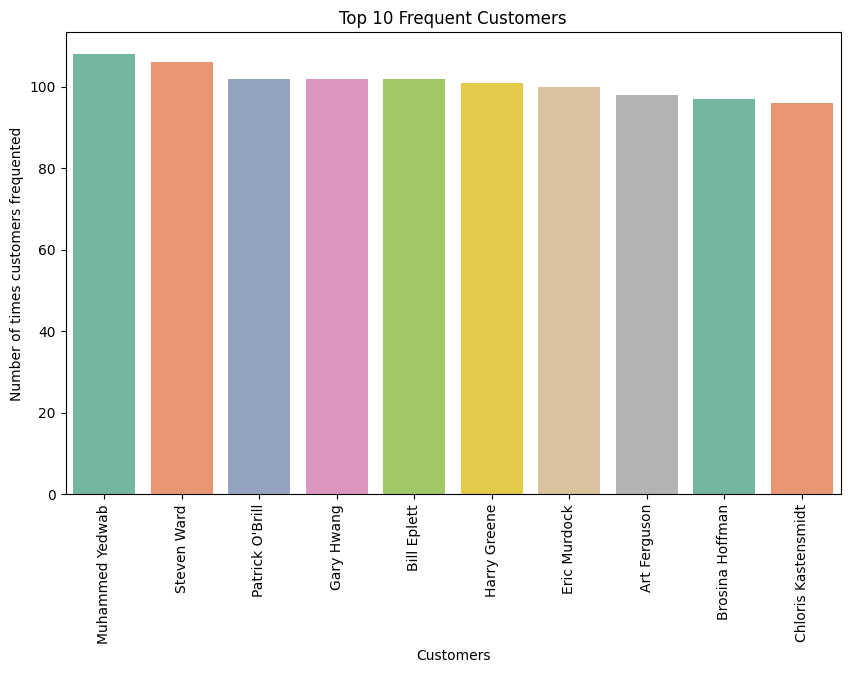

In [107]:
a=df.groupby("Customer Name").agg({"Product ID":"count"}).sort_values("Product ID",ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x = a.index[:10], y = a['Product ID'][:10], palette='Set2')
plt.xlabel('Customers')
plt.ylabel('Number of times customers frequented')
plt.xticks(rotation = 90)
plt.title('Top 10 Frequent Customers')

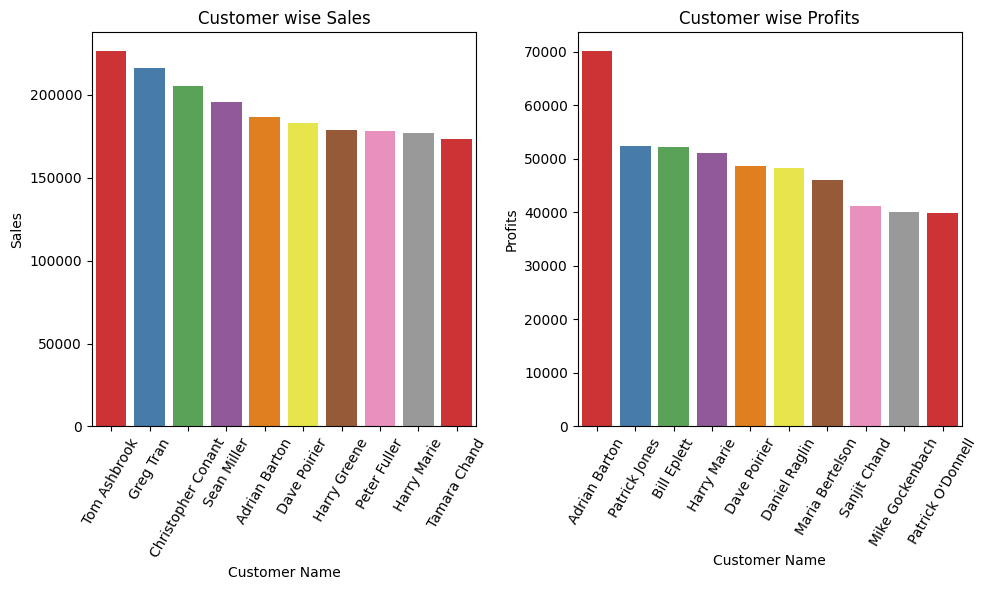

In [108]:
a=df.groupby("Customer Name").agg({"Total Sales":"sum"}).sort_values("Total Sales",ascending=False)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(x = a.index[:10], y = a['Total Sales'][:10], palette='Set1')
plt.xlabel('Customer Name')
plt.ylabel('Sales')
plt.xticks(rotation = 60)
plt.title('Customer wise Sales')

a=df.groupby("Customer Name").agg({"Total Profit":"sum"}).sort_values("Total Profit",ascending=False)
plt.subplot(1,2,2)
sns.barplot(x = a.index[:10], y = a['Total Profit'][:10], palette='Set1')
plt.xlabel('Customer Name')
plt.ylabel('Profits')
plt.xticks(rotation = 60)
plt.title('Customer wise Profits')
plt.tight_layout()
plt.show()

<H2>Product Performance

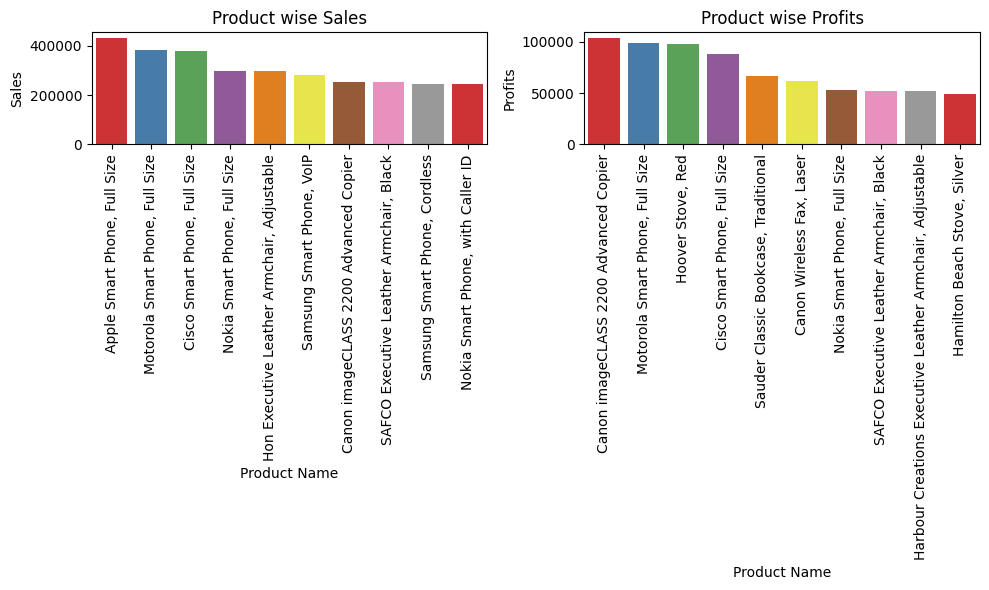

In [109]:
a=df.groupby("Product Name").agg({"Total Sales":"sum"}).sort_values("Total Sales",ascending=False)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(x = a.index[:10], y = a['Total Sales'][:10], palette='Set1')
plt.xlabel('Product Name')
plt.ylabel('Sales')
plt.xticks(rotation = 90)
plt.title('Product wise Sales')

a=df.groupby("Product Name").agg({"Total Profit":"sum"}).sort_values("Total Profit",ascending=False)
plt.subplot(1,2,2)
sns.barplot(x = a.index[:10], y = a['Total Profit'][:10], palette='Set1')
plt.xlabel('Product Name')
plt.ylabel('Profits')
plt.xticks(rotation = 90)
plt.title('Product wise Profits')
plt.tight_layout()
plt.show()

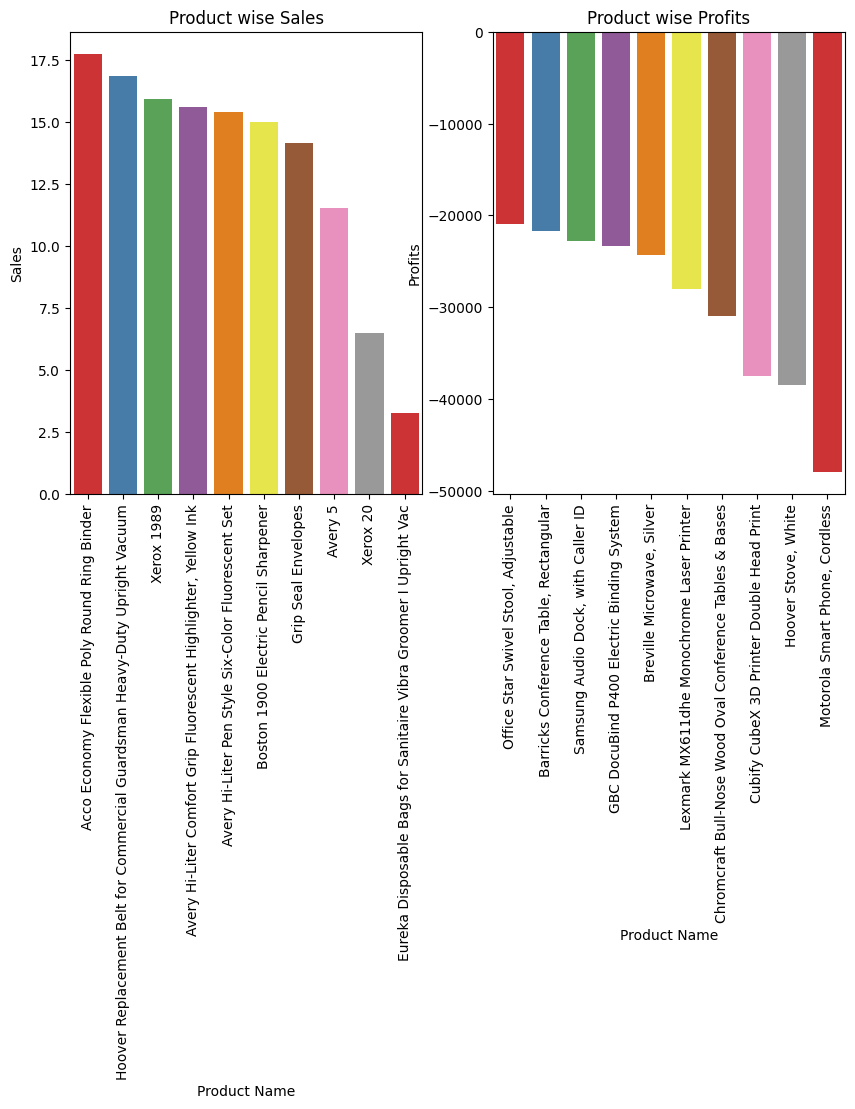

In [110]:
a=df.groupby("Product Name").agg({"Total Sales":"sum"}).sort_values("Total Sales",ascending=False)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(x = a.index[-10:], y = a['Total Sales'][-10:], palette='Set1')
plt.xlabel('Product Name')
plt.ylabel('Sales')
plt.xticks(rotation = 90)
plt.title('Product wise Sales')

a=df.groupby("Product Name").agg({"Total Profit":"sum"}).sort_values("Total Profit",ascending=False)
plt.subplot(1,2,2)
sns.barplot(x = a.index[-10:], y = a['Total Profit'][-10:], palette='Set1')
plt.xlabel('Product Name')
plt.ylabel('Profits')
plt.xticks(rotation = 90)
plt.title('Product wise Profits')
plt.tight_layout()
plt.show()

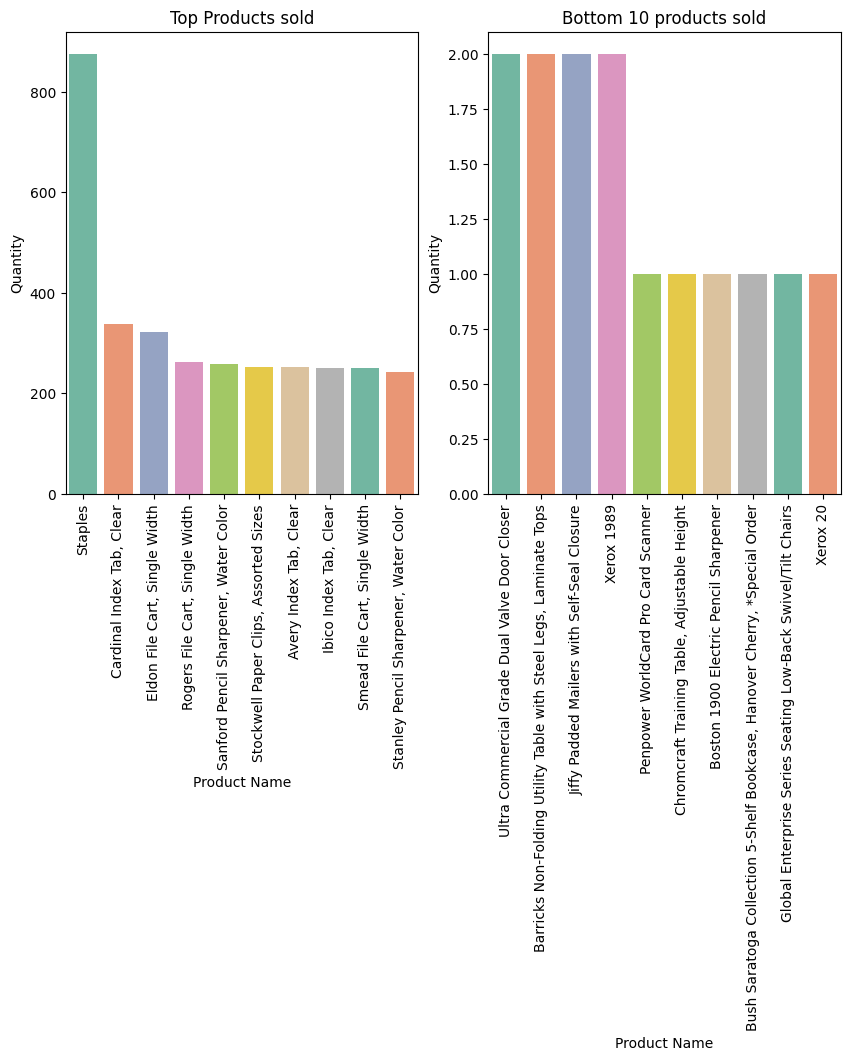

In [111]:
a=df.groupby("Product Name").agg({"Quantity":"sum"}).sort_values("Quantity",ascending=False)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(x = a.index[:10], y = a['Quantity'][:10], palette='Set2')
plt.xlabel('Product Name')
plt.ylabel('Quantity')
plt.xticks(rotation = 90)
plt.title('Top Products sold')

plt.subplot(1,2,2)
sns.barplot(x = a.index[-10:], y = a['Quantity'][-10:], palette='Set2')
plt.xlabel('Product Name')
plt.ylabel('Quantity')
plt.xticks(rotation = 90)
plt.title('Bottom 10 products sold')
plt.tight_layout()

<H2>Regional Analysis

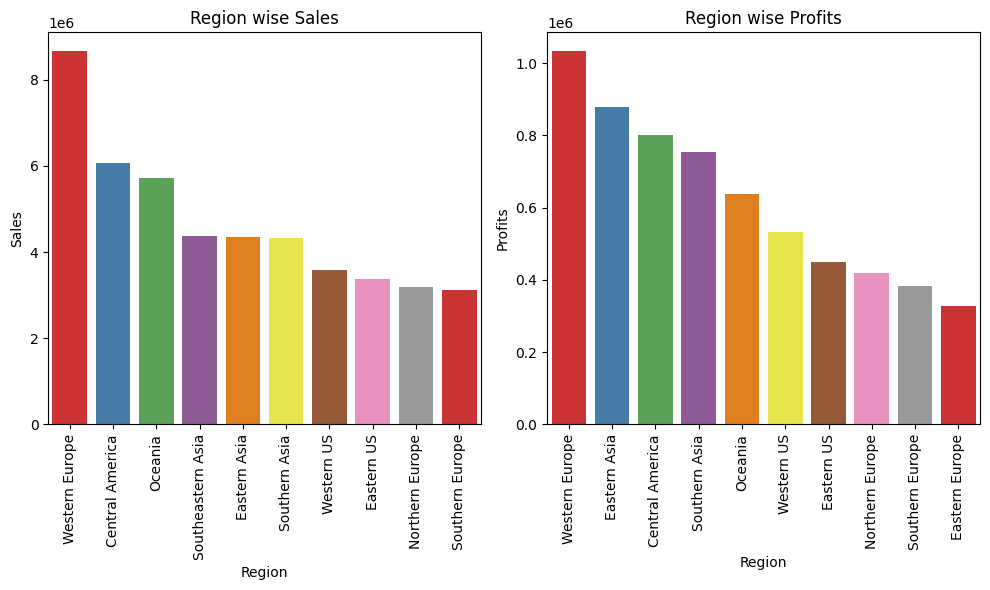

In [112]:
a=df.groupby("Region").agg({"Total Sales":"sum"}).sort_values("Total Sales",ascending=False)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(x = a.index[:10], y = a['Total Sales'][:10], palette='Set1')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation = 90)
plt.title('Region wise Sales')

a=df.groupby("Region").agg({"Total Profit":"sum"}).sort_values("Total Profit",ascending=False)
plt.subplot(1,2,2)
sns.barplot(x = a.index[:10], y = a['Total Profit'][:10], palette='Set1')
plt.xlabel('Region')
plt.ylabel('Profits')
plt.xticks(rotation = 90)
plt.title('Region wise Profits')
plt.tight_layout()

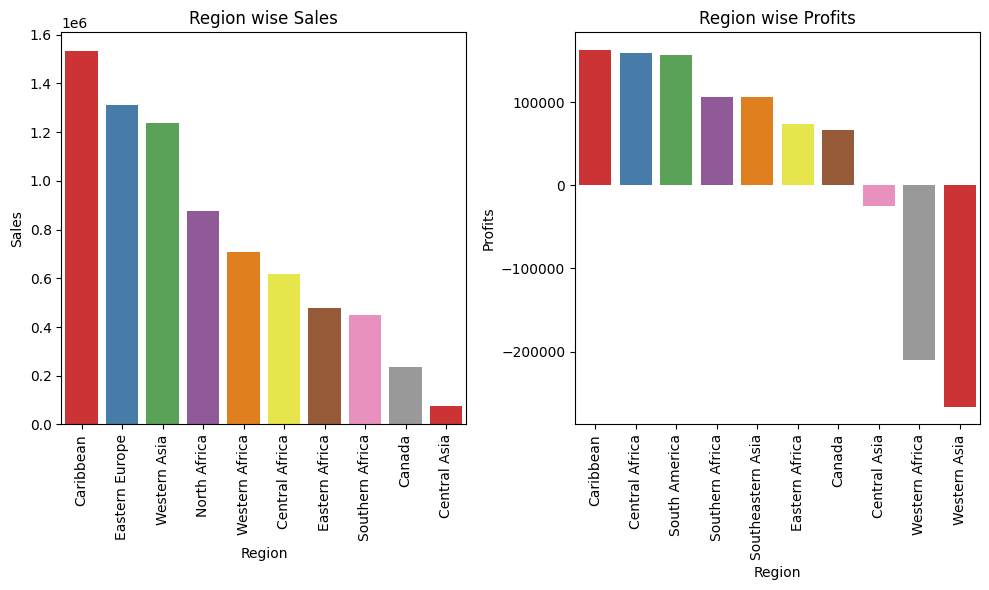

In [113]:
a=df.groupby("Region").agg({"Total Sales":"sum"}).sort_values("Total Sales",ascending=False)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(x = a.index[-10:], y = a['Total Sales'][-10:], palette='Set1')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation = 90)
plt.title('Region wise Sales')

a=df.groupby("Region").agg({"Total Profit":"sum"}).sort_values("Total Profit",ascending=False)
plt.subplot(1,2,2)
sns.barplot(x = a.index[-10:], y = a['Total Profit'][-10:], palette='Set1')
plt.xlabel('Region')
plt.ylabel('Profits')
plt.xticks(rotation = 90)
plt.title('Region wise Profits')
plt.tight_layout()

<H2>Shipping Dynamics

In [114]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Region', 'Market', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority', 'Returned', 'Year', 'Month', 'Day',
       'Total Sales', 'Total Profit'],
      dtype='object')

Text(0.5, 1.0, 'Shopment Mode Frequency')

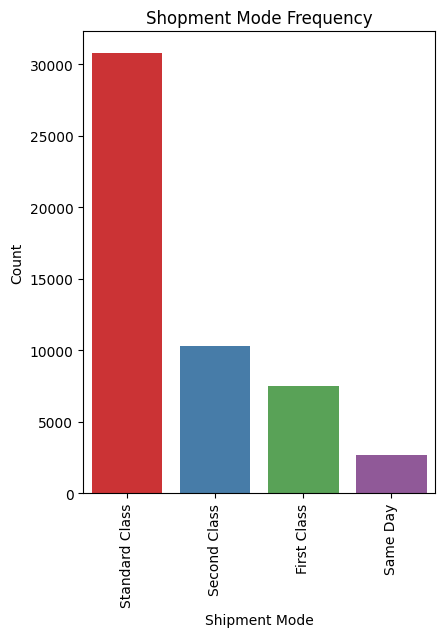

In [115]:
a = df['Ship Mode'].value_counts()
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(x = a.index, y = a, palette='Set1')
plt.xlabel('Shipment Mode')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.title('Shopment Mode Frequency')

Text(0.5, 1.0, 'Shipping Cost for Shipment Mode')

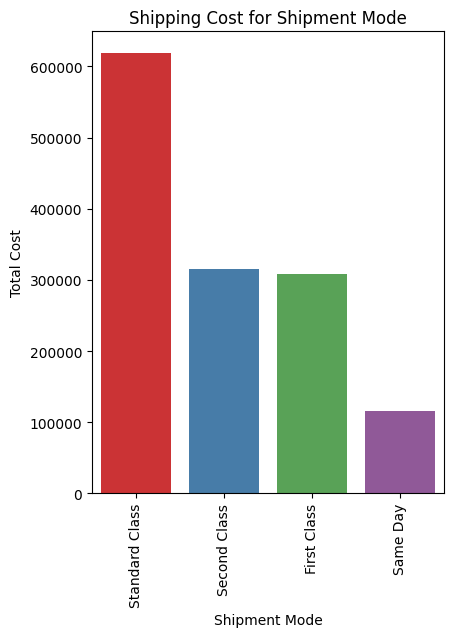

In [116]:
a=df.groupby("Ship Mode").agg({"Shipping Cost":"sum"}).sort_values("Shipping Cost",ascending=False)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(x = a.index, y = a['Shipping Cost'], palette='Set1')
plt.xlabel('Shipment Mode')
plt.ylabel('Total Cost')
plt.xticks(rotation = 90)
plt.title('Shipping Cost for Shipment Mode')

<H2>Discount Analysis

Text(0.5, 1.0, 'Total Sales per discount value')

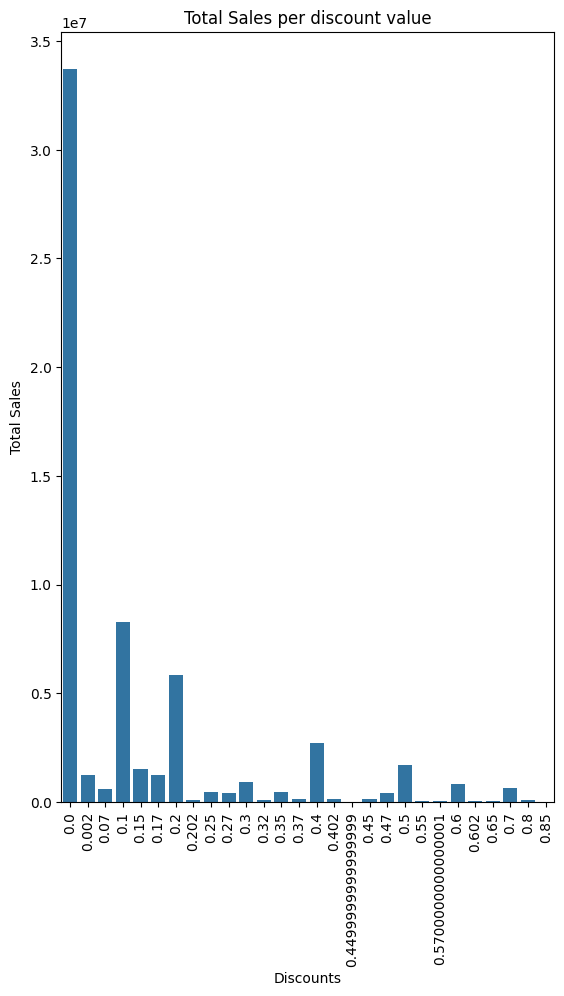

In [117]:
a=df.groupby("Discount").agg({"Total Sales":"sum"}).sort_values("Total Sales",ascending=False)
plt.figure(figsize=(14,10))
plt.subplot(1,2,1)
sns.barplot(x = a.index, y = a['Total Sales'])
plt.xlabel('Discounts')
plt.ylabel('Total Sales')
plt.xticks(rotation = 90)
plt.title('Total Sales per discount value')

Text(0.5, 1.0, 'Total Profit per discount value')

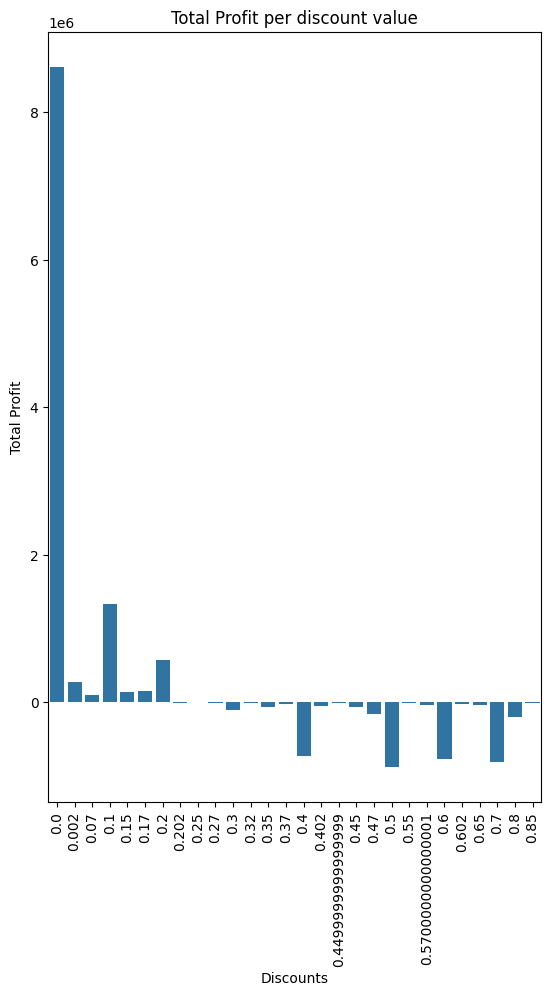

In [118]:
a=df.groupby("Discount").agg({"Total Profit":"sum"}).sort_values("Total Profit",ascending=False)
plt.figure(figsize=(14,10))
plt.subplot(1,2,1)
sns.barplot(x = a.index, y = a['Total Profit'])
plt.xlabel('Discounts')
plt.ylabel('Total Profit')
plt.xticks(rotation = 90)
plt.title('Total Profit per discount value')

<H2>Return Analysis

In [119]:
df['Returned'].value_counts()

Returned
No     49088
Yes     2202
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 products returned')

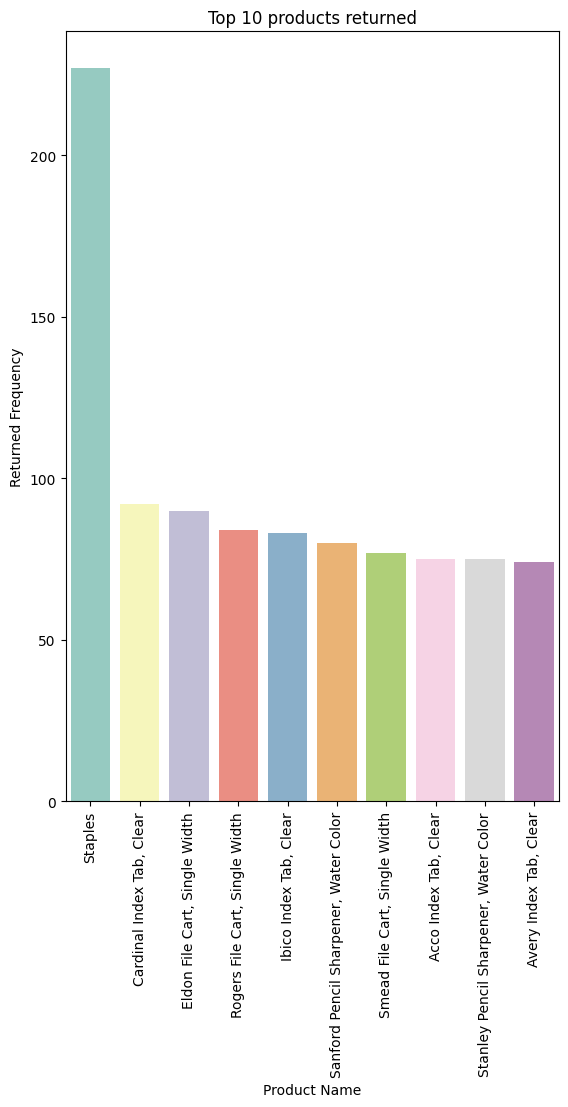

In [120]:
a=df.groupby("Product Name").agg({"Returned":"count"}).sort_values("Returned",ascending=False)
plt.figure(figsize=(14,10))
plt.subplot(1,2,1)
sns.barplot(x = a.index[:10], y = a['Returned'][:10], palette='Set3')
plt.xlabel('Product Name')
plt.ylabel('Returned Frequency')
plt.xticks(rotation = 90)
plt.title('Top 10 products returned')